In [13]:
from settings import GEMINI_API_KEY
import google.generativeai as genai
genai.configure(api_key = GEMINI_API_KEY)

for m in genai.list_models():
    if 'generateContent' in m.supported_generation_methods:
        print(m.name)

model = genai.GenerativeModel('models/gemini-1.0-pro-latest')
model.count_tokens("The quick brown fox jumps over the lazy dog.")


models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro-latest
models/gemini-pro
models/gemini-pro-vision


total_tokens: 10

In [12]:
text= "testsetsetset"
title = "test"
test = genai.embed_content(model='models/text-embedding-004', 
                    content=text,
                    task_type = "retrieval_document",
                    title = title)

NotFound: 404 models/text-embedding-001 is not found for API version v1beta, or is not supported for embedContent. Call ListModels to see the list of available models and their supported methods.

# 1) RAG outline:


In [10]:
from RAG.traveller import RAG
rag = RAG()

SHEET_NAME = "Master Database" 
WORKSHEET_NAME = "inventory_processed"
df = rag.get_df(sheet_name = SHEET_NAME, worksheet_name = WORKSHEET_NAME)

d:\PycharmProjects\smart-travels\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df1 = rag.embed_df(df, title="Title", text="Text")

In [3]:
df1

,Destination,Title,Text,Embeddings
0,partners - putrajaya - cruise,cruise tasik putrajaya,Cruise Tasik Putrajaya\nCruise beyond your im...,"[0.02785702, 0.04049749, -0.038079727, -0.0661..."
1,partners - malacca - attractions,menara taming sari,MENARA TAMING SARI\nMELAKA\n\nTaming Sari Tow...,"[0.04842721, 0.06566964, -0.001694597, -0.0012..."
2,partners - malacca - attractions,melaka river cruise,MELAKA RIVER CRUISE\nS.M.A. MELAKA\n\nwww.mel...,"[0.060001522, 0.05154308, -0.019224696, -0.050..."
3,partners - terengganu - accommodation,perhentian island resort,**Perhentian Island Resort**\n\nPulau Perhent...,"[0.04545973, -0.003452046, -0.0065804133, -0.0..."
4,partner - terengganu - tour package,ag holidays,Pakej Aktiviti\nKem Pelajar & IPT\nSetu Adven...,"[-0.002626957, -0.0129379155, -0.025428655, -0..."
5,partners - terengganu - tour package,tenggol coral beach resort,Tenggol \nCoral Beach \nResort\n\n浮潜配套\n配套包括：...,"[0.057933476, 0.010546263, -0.009384707, -0.00..."
6,partners - terengganu - accommodation,ag holidays,AG SUITES\nKETENANGAN ITU MEMBAHAGIAKAN\n011-...,"[0.04481308, -0.001814087, 0.036361963, -0.020..."
7,partners - johor - theme park,legoland,MATTA FAIR EXCLUSIVE \nMitec 2C01\n\nPAY FOR ...,"[0.019847477, 0.0076364363, 0.002201427, -0.03..."
8,partners - johor - theme park,legoland,MATTA FAIR EXCLUSIVE \nMitec 2C01\n\nPAY FOR ...,"[0.01988468, 0.0057520024, 0.0025358577, -0.03..."
9,partners - negeri sembilan - leisure,sky ladder pineapple farm,SkyLadder\nPineapple Farm\nNature. Explore. R...,"[0.021492492, 0.026504407, -0.028603036, -0.00..."


In [5]:
query_embedding = rag.embed_text("penang exciting place to visit", task_type="retrieval_query")

In [9]:
import numpy as np
import pandas as pd
dataframe = df1
topN = 2

dot_products = np.dot(np.stack(dataframe['Embeddings']), query_embedding)
idx = np.argsort(dot_products)[-topN:][::-1]

# Create a DataFrame with passages and scores
top_passages = pd.DataFrame({'Text': dataframe.iloc[idx]['Text'], 'Score': dot_products[idx]})

In [10]:
top_passages.reset_index(drop=True).rename(columns={'Text': 'Passage', 'Score': 'Similarity Score'})

,Passage,Similarity Score
0,AG SUITES\nKETENANGAN ITU MEMBAHAGIAKAN\n011-...,-0.024121
1,Tasiik Villa\nInternational Resort\nPort Dick...,-0.041005


In [11]:
top_passages

,Text,Score
6,AG SUITES\nKETENANGAN ITU MEMBAHAGIAKAN\n011-...,-0.024121
11,Tasiik Villa\nInternational Resort\nPort Dick...,-0.041005


## 2) Cohere RAG test

In [1]:
from RAG.cohere_RAG import RAG
query = "Penang, 2 days, foodie"
rag = RAG()
result, recommendations = rag.rag_pipeline(query = query, sheet_name = "Master Database", worksheet_name="inventory_processed", reembed= False)

In [27]:
print(recommendations[0])

**Activities Description:**

Enjoy a spacious room suitable for families. Immerse yourself in the local delights of Penang. Take a refreshing dip in the new splash pool.

**Highlights:**

* Spacious family-friendly rooms
* Local culinary experiences
* New splash pool

**Timings:**

NA

**Pricings:**

* RM158nett per night

**Contact Information:**

* Phone: 011-1739 8714
* Website: www.raiahotels.com.my

**Terms and Conditions:**

* Prices include 8% service charge and 6% SST.
* Buy now, stay later until 30th September 2024.
* Surcharge of RM50 applicable for eve of public holidays and public holidays.


# 2) Traveller 2

In [11]:
import importlib
import json
from RAG import traveller
importlib.reload(traveller)
from settings import GEMINI_API_KEY1 as GEMINI_API_KEY1
from prompt_engineering.jsonSchemas import intent_jsonSchema, travel_jsonSchema, travel_jsonSchema_duo
from prompt_engineering.responses import EMPTY_RESPONSE, NULL_RESPONSE
from prompt_engineering.travel_agent import travel_package_inner_prompt, travel_package_inner_prompt_duo

from RAG.traveller import traveller
rag = traveller()
# message = {
#      "destination": "terengganu",
#      "dates": "july",
#      "duration": "3 days",
#      "number_of_pax": "2",
#      "filter": "hidden gems",
#      "budget": "$1000"
#  }

# df = rag.get_df(sheet_name = "Master Database", worksheet_name = "inventory_processed")

# message = {"prompt": "i want to plan a trip to perlis for 2 days for 2 pax, exciting theme"}
# itinerary_payload = rag.generate_travel_itinerary(message=message)

model = rag.build_model(model_name="gemini-1.5-pro-latest", api_key=GEMINI_API_KEY1)

client_requirements = "i want to go to perlis for 5 days for 2 pax, exciting, foodie theme"
top_inventories = None

travel_package_prompt = f"""You are a soulful and poetic travel agent creating a comprehensive itinerary given client requirements and available inventory.

        ****INPUTS****
        ***Client Requirements:***
        IMPORTANT: The itinerary must strictly adhere to the client requirements: duration, destination, tags, budget;
        {client_requirements}
        ***Available inventory:***
        {top_inventories}
        Following content outline:
        {travel_package_inner_prompt}
        Follow the JSON schema strictly (from the content outline above) fill in all required fields:
        <JSONSchema>{json.dumps(travel_jsonSchema)}</JSONSchema>

        """

# response = rag.prompt(model=model, query=travel_package_prompt)
responses = model.generate_content(travel_package_prompt, stream=True)
text_response = []
for chunk in responses:
        text_response.append(chunk.text)
        print(chunk.text)


{"
title": "Exciting Foodie Adventure in Perlis, Malaysia", "type":
 "object", "properties": {"summary": "Embark on an exhilarating culinary
 journey through the captivating region of Perlis, Malaysia! This 5-day, 2-person itinerary is tailor-made for adventurous foodies seeking authentic
 flavors and unforgettable experiences. Discover hidden culinary gems, savor tantalizing local delicacies, and immerse yourselves in the vibrant culture of this enchanting destination. Get ready to tantal
ize your taste buds and create lasting memories in the heart of Perlis!", "country": "Malaysia", "cover": "/malaysia/perlis/cover.jpg", "itinerary": [{"day": 1, "title
": "Arrival in Perlis and Culinary Delights of Kangar", "description": "Welcome to Perlis! Upon arrival at the airport, you'll be met by your friendly driver and whisked away to your hotel in Kangar
, the state capital. Settle in and embark on a captivating culinary adventure through the heart of Kangar. Start your gastronomic explorat

In [4]:
from RAG import traveller
import importlib
importlib.reload(traveller)
from RAG.traveller import traveller
rag = traveller()
stream_generator = rag.generate_travel_itinerary({"prompt":"i want to go perlis for 5 days for foodie theme"}, stream=True)

Prompt: i want to go perlis for 5 days for foodie theme
----> {'destination': 'perlis', 'dates': 'NAN', 'duration': '5 days', 'number_of_pax': 1, 'filter': ['foodie'], 'budget': 'NAN', 'prompt': 'i want to go perlis for 5 days for foodie theme'}
Loading inventory...
Filtering inventory...
                         Type Tags                   Title  \
114                 excursion         unic astana holidays   
115                 excursion       unic astana holidays 3   
116                 excursion       unic astana holidays 2   
117   excursion accommodation        smart leisure travels   
118             accommodation             gua kelam chalet   
119                 excursion                nakawan ultra   
120                 excursion                    club rock   
122                 excursion       unic astana holidays 4   

                                           Description Vendor ID Activity ID  
114   # PERLIS ECO XVENTURE - LET'S TRAVEL WITH OUR...      1327        

IncompleteIterationError: Please let the response complete iteration before accessing the final accumulated
attributes (or call `response.resolve()`)

In [7]:
pip install gunicorn

  Using cached gunicorn-22.0.0-py3-none-any.whl.metadata (4.4 kB)
Using cached gunicorn-22.0.0-py3-none-any.whl (84 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
# how to expand RAGBOT
# itinerary generated but not fulfilled (for window shoppers) but fulfilled BY SWT
## eg: if the itinerary has produced a list of activities, and user has purchased
## the activities, then the itinerary is **fulfilled** by SWT

# trajectory: recommendation -> itinerary -> purchase -> fulfillment if fullfilled 
# ----> then these vendors are most fulfillable. 


# future requirements: get fulfilled itineraries. 

# - get all the prompts database



# all this data, gemini i suggestion should come with pictures 
# ---- 
# ---- HOW THEY USE AI
# (1) marketing material for investors
# (2) optimise << 5% of the itinerary curation (but ONLY 5%?? this sux)
# (3) BUT THIS ALSO generates value: demand supply datapoints for user generated itinerary (to convert windowshopper to fulfillable)
# (3b) User-centric data: (foreign key: userID, 
# (3c) historical itinerary dump (foreign key: userID, itineraryID, fulfilled) ---> email sending 




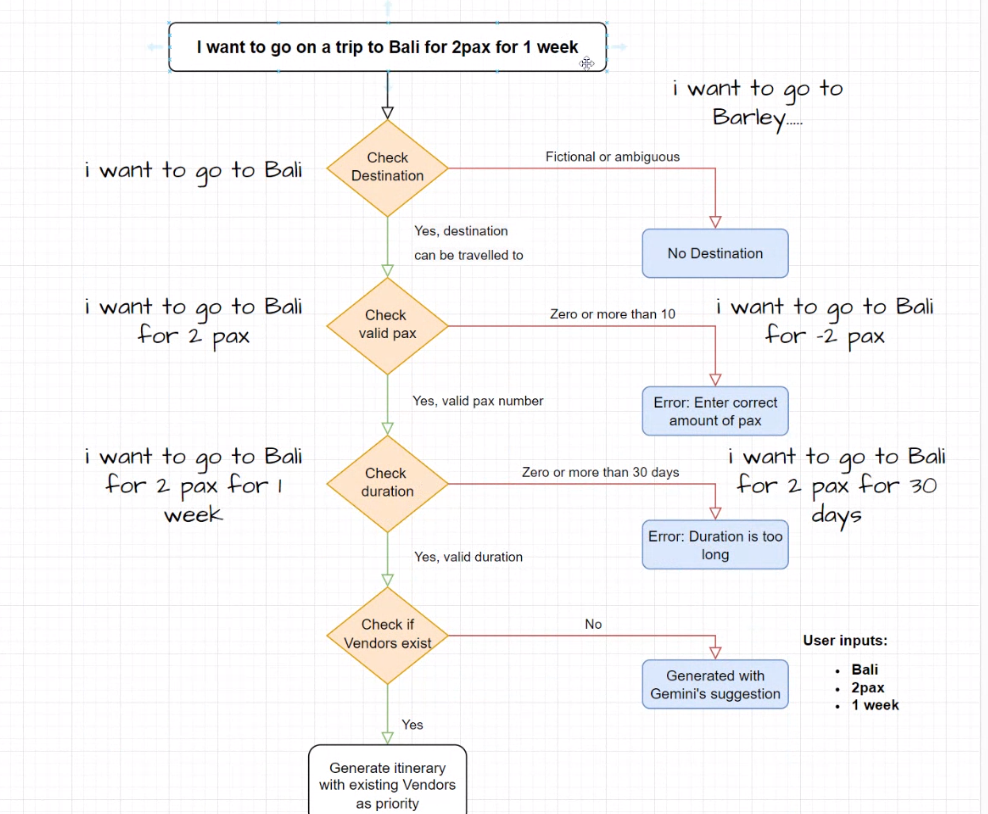
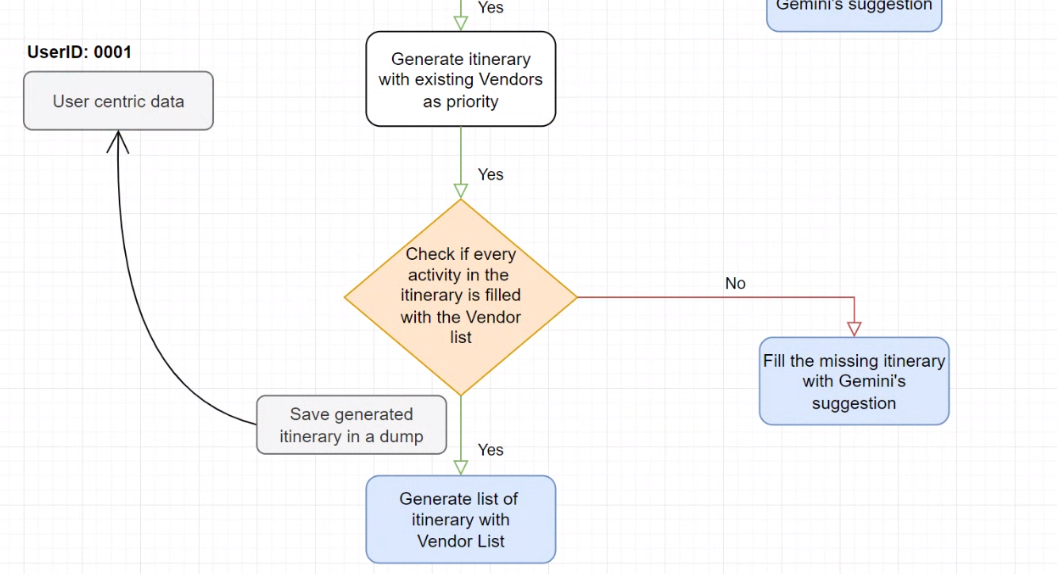

In [4]:
pip install whisper

     ---------------------------------------- 0.0/42.8 kB ? eta -:--:--
     --------------------------- ---------- 30.7/42.8 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 42.8/42.8 kB 693.5 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for whisper: filename=whisper-1.1.10-py3-none-any.whl size=41393 sha256=8e1af14979a07c60aef11a5664f59b7adc2ab3b194fae9d371ec5fbe9f88f732
  Stored in directory: c:\users\shaik\appdata\local\pip\cache\wheels\34\b8\4e\9c4c3351d670e06746a340fb4b7d854c76517eec225e5b32b1
Successfully built whisper
Note: you may need to r

In [12]:
from utils.pickle_helper

1718954163638.347

In [12]:
import importlib
from gdrive import gdrive_handler
importlib.reload(gdrive_handler)
from gdrive.gdrive_handler import GspreadHandler
from settings import CREDENTIALS_FILE, SHEET_NAME, WORKSHEET_PROMPTS_NAME, BEARER_TOKEN_SECRET_KEY
gspread_handler = GspreadHandler(credentials_filepath=CREDENTIALS_FILE)
timestamp_input = "1719205230160872300"
row_data = gspread_handler.get_row_by_timestamp(SHEET_NAME, WORKSHEET_PROMPTS_NAME,timestamp_input)
print(f"row_data:\n\n{row_data}")


timestamp input: <1719205230160872300>
"1719205230160872300" vs 1719205230160872300
Empty DataFrame
Columns: [timestamp, prompt, itinerary]
Index: []
row_data:

None


In [16]:
from utils.pickle_helper import pickle_this
top_inventories_json = pickle_this(pickle_name="top_inventories", path="./database/top_inventories/")

In [17]:
print(top_inventories_json)

[{"Title":"Perhentian Island Resort","Vendor ID":"TRGACC01","Activity ID":"4","Type":"Accommodation","Tags":"Mid-Range Hotels (3-Star), Beachfront Hotels","Description":"**Pricings:**\n**Perhentian Discovery Package:**\n* **3 Days 2 Nights Discovery Full Board Package 2024\/2025**\n    * **Low Season: February, March, October**\n* ROOM TYPE\n- Deluxe Heaven\n        * Single: RM830.00\n        * Double: RM580.00\n        * Triple: RM530.00\n- Superior Classic\n        * Single: RM850.00\n        * Double: RM595.00\n        * Triple: RM545.00\n- Premier Garden\n        * Single: RM880.00\n        * Double: RM615.00\n        * Triple: RM565.00\n- Premier Beachfront\n        * Single: RM945.00\n        * Double: RM665.00\n        * Triple: RM595.00\n- Extended Deluxe Heaven (per room per night)\n        * Single: RM380.00\n        * Double: RM255.00\n        * Triple: RM230.00\n- Extended Superior Classic (per room per night)\n        * Single: RM390.00\n        * Double: RM262.50\n      

In [18]:
top_inventories_json

'[{"Title":"Perhentian Island Resort","Vendor ID":"TRGACC01","Activity ID":"4","Type":"Accommodation","Tags":"Mid-Range Hotels (3-Star), Beachfront Hotels","Description":"**Pricings:**\\n**Perhentian Discovery Package:**\\n* **3 Days 2 Nights Discovery Full Board Package 2024\\/2025**\\n    * **Low Season: February, March, October**\\n* ROOM TYPE\\n- Deluxe Heaven\\n        * Single: RM830.00\\n        * Double: RM580.00\\n        * Triple: RM530.00\\n- Superior Classic\\n        * Single: RM850.00\\n        * Double: RM595.00\\n        * Triple: RM545.00\\n- Premier Garden\\n        * Single: RM880.00\\n        * Double: RM615.00\\n        * Triple: RM565.00\\n- Premier Beachfront\\n        * Single: RM945.00\\n        * Double: RM665.00\\n        * Triple: RM595.00\\n- Extended Deluxe Heaven (per room per night)\\n        * Single: RM380.00\\n        * Double: RM255.00\\n        * Triple: RM230.00\\n- Extended Superior Classic (per room per night)\\n        * Single: RM390.00\\n     

In [3]:
pip install langchain-google-genai

In [5]:
pip install chromadb

  Using cached build-1.2.1-py3-none-any.whl.metadata (4.3 kB)
  Using cached chroma-hnswlib-0.7.3.tar.gz (31 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached fastapi-0.111.0-py3-none-any.whl.metadata (25 kB)
  Using cached posthog-3.5.0-py2.py3-none-any.whl.metadata (2.0 kB)
  Using cached onnxruntime-1.18.0-cp312-cp312-win_amd64.whl.metadata (4.4 kB)
  Using cached PyPika-0.48.9-py2.py3-none-any.whl
  Using cached overrides-7.7.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached importlib_resources-6.4.0-py3-none-any.whl.metadata (3.9 kB)
  Using cached bcrypt-4.1.3-cp39-abi3-win_amd64.whl.metadata (9.8 kB)
  Using cached typer-0.12.3-py3-none-any.whl.metadata (15 kB)
  Using cached mmh3-4.

  error: subprocess-exited-with-error
  
  × Building wheel for chroma-hnswlib (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [5 lines of output]
      running bdist_wheel
      running build
      running build_ext
      building 'hnswlib' extension
      error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for chroma-hnswlib
ERROR: Could not build wheels for chroma-hnswlib, which is required to install pyproject.toml-based projects


In [6]:
from langchain_google_genai import ChatGoogleGenerativeAI

from langchain.vectorstores import Chroma

from settings import GEMINI_API_KEY
llm = ChatGoogleGenerativeAI(model="gemini-pro",google_api_key=GEMINI_API_KEY)

ModuleNotFoundError: No module named 'langchain'

In [4]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings

embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001",google_api_key=GOOGLE_API_KEY)
vector_index = Chroma.from_texts(texts, embeddings).as_retriever(search_kwargs={"k":5})